##  🧠 Business Intelligence App using Python (Jupyter Notebook)

##  📦 Installing required packages

In [9]:
!pip install requests textblob pandas plotly matplotlib ipython -q

##  📚 Importing Libraries

In [12]:
import requests
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# ✅ Ensuring TextBlob is installed
try:
    from textblob import TextBlob
except ModuleNotFoundError:
    import os
    os.system('pip install textblob')
    from textblob import TextBlob

## 🔑 Constants

In [14]:

NEWS_API_KEY = '2258ed81202e49feb5bf3a1e43361046'  # Replace with your own API key
NEWS_API_URL = 'https://newsapi.org/v2/everything'

## 🔍 Function to fetch news articles

In [18]:
def fetch_news(query, page_size=20):
    params = {
        'q': query,
        'language': 'en',
        'sortBy': 'publishedAt',
        'pageSize': page_size,
        'apiKey': NEWS_API_KEY
    }
    response = requests.get(NEWS_API_URL, params=params)
    data = response.json()
    articles = data.get('articles', [])
    return articles

##  📈 Function to analyze sentiment

In [23]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

## 🚀 Main Execution

🔎 Enter a company or topic to analyze:  google


📡 Fetching and analyzing news articles...


,Published At,Title,Source,Sentiment
0,2025-03-20T20:30:11Z,Grounding Gemini With Google Search and Other ...,Dzone.com,Negative
1,2025-03-20T20:23:20Z,Google Pixel 10a: What we expect to see,Android Central,Neutral
2,2025-03-20T20:22:30Z,Stop squabbling with PDF files thanks to SwifD...,9to5Toys,Positive
3,2025-03-20T20:22:07Z,Gandalf the White and Shadowfax Arrive for Iro...,Bleeding Cool News,Positive
4,2025-03-20T20:21:19Z,jupyter notebookよりもMarimoが便利そう - Qiita,Qiita.com,Neutral
5,2025-03-20T20:17:01Z,The best Google Pixel 9 deals of March 2025 — ...,Android Central,Positive
6,2025-03-20T20:17:00Z,"Anker’s Omni C20 robot vac & mop self-empties,...",9to5Toys,Neutral
7,2025-03-20T20:15:45Z,Model’s Near-Lifeless Body Found On Roadside I...,Boredpanda.com,Negative
8,2025-03-20T20:12:30Z,A high schooler built a website that lets you ...,TechCrunch,Positive
9,2025-03-20T20:12:12Z,Sextortion scams are on the rise — and they’re...,Avast.com,Neutral


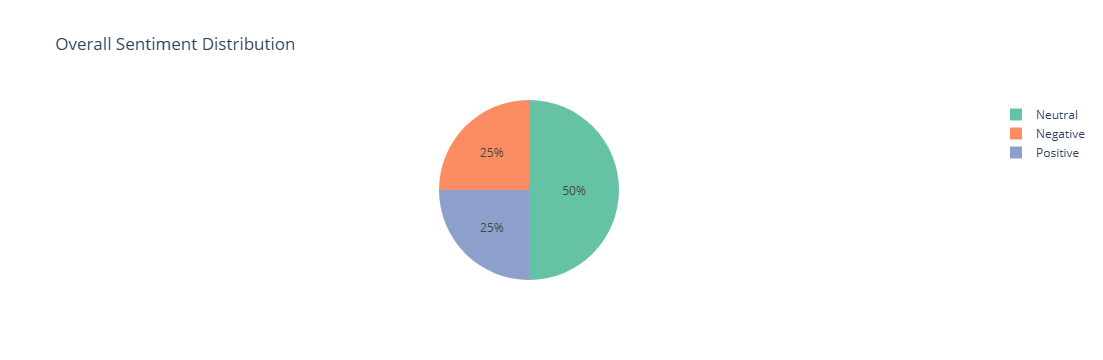

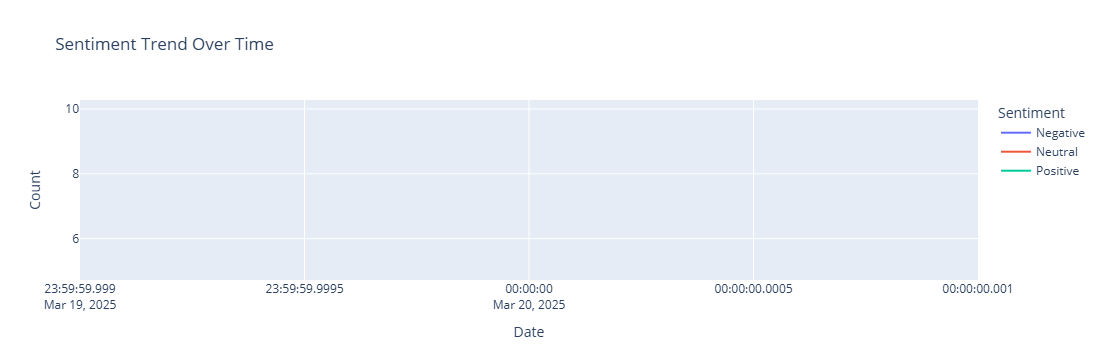

In [32]:
query = input("🔎 Enter a company or topic to analyze: ")

if query:
    print("📡 Fetching and analyzing news articles...")

    articles = fetch_news(query)

    if not articles:
        print("❌ No articles found. Try a different keyword.")
    else:
        # 🧾 Create DataFrame from articles
        df = pd.DataFrame([{
            'Published At': a['publishedAt'],
            'Title': a['title'],
            'Source': a['source']['name'],
            'URL': a['url'],
            'Sentiment': analyze_sentiment(a['title'])
        } for a in articles])
          # 📰 Display news headlines
        display(HTML('<h3>📰 Latest News Headlines</h3>'))
        display(df[['Published At', 'Title', 'Source', 'Sentiment']])

        # 📊 Sentiment distribution chart
        sentiment_counts = df['Sentiment'].value_counts().reset_index()
        sentiment_counts.columns = ['Sentiment', 'Count']
        fig_pie = px.pie(
            sentiment_counts,
            values='Count',
            names='Sentiment',
            title='Overall Sentiment Distribution',
            color_discrete_sequence=px.colors.qualitative.Set2
        )
        fig_pie.show()

        # 📆 Sentiment trend over time
        df['Published At'] = pd.to_datetime(df['Published At'])
        df['Date'] = df['Published At'].dt.date
        trend_df = df.groupby(['Date', 'Sentiment']).size().reset_index(name='Count')

        fig_line = px.line(
            trend_df,
            x='Date',
            y='Count',
            color='Sentiment',
            title='Sentiment Trend Over Time'
        )
        fig_line.show()

        # 🔗 Top headlines with clickable links
        display(HTML('<h3>🔗 Top Headlines</h3>'))
        for _, row in df.iterrows():
            display(HTML(f"<a href='{row['URL']}' target='_blank'>{row['Title']}</a><br>"))

else:
    print("⚠️ Please enter a company or topic.")


